# <ins>***Density-Based Clustering Algorithm***

<h3><u><b>Aim</b></u> : Understanding How to implement the Density-Based Clustering Algorithm and its superiority against other Density-Based Clustering Algorithms</h3>

<h1><b><u>Intoduction</u></b></h1><h3>DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.<br>It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.</h3>

<img src="https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif">

<h3>DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.</h3>

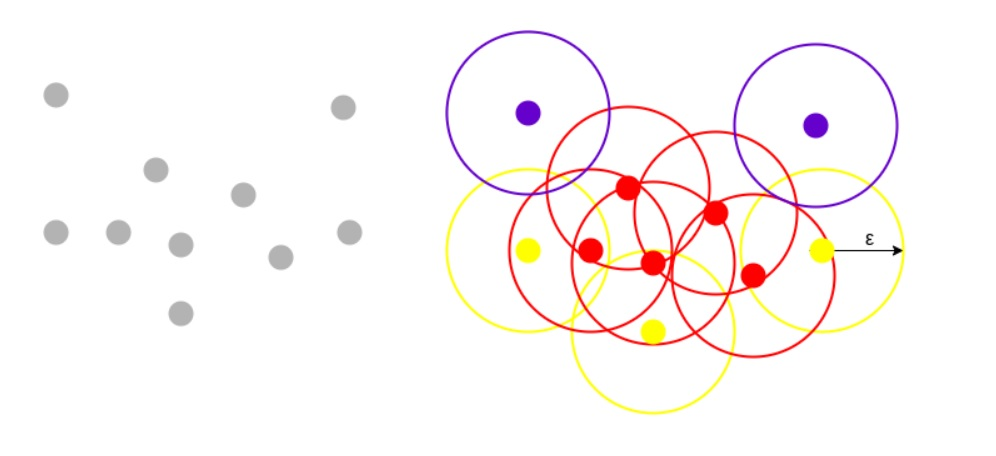

<h3>DBSCAN creates a circle of epsilon radius around every data point and classifies them into Core point, Border point, and Noise. A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points. If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise.<br>The above figure shows us a cluster created by DBCAN with minPoints = 3. Here, we draw a circle of equal radius epsilon around every data point. These two parameters help in creating spatial clusters.
All the data points with at least 3 points in the circle including itself are considered as Core points represented by red color. All the data points with less than 3 but greater than 1 point in the circle including itself are considered as Border points. They are represented by yellow color. Finally, data points with no point other than itself present inside the circle are considered as Noise represented by the purple color.</h3>

In [ ]:
# Importing the necessary libraries.
import numpy as np                  # for mathematical operations on arrays 
import pandas as pd                 # creating dataframe
import math
import matplotlib.pyplot as plt     # for plotting graphs
import matplotlib

In [ ]:
np.random.seed(42)
# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [ ]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))
# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


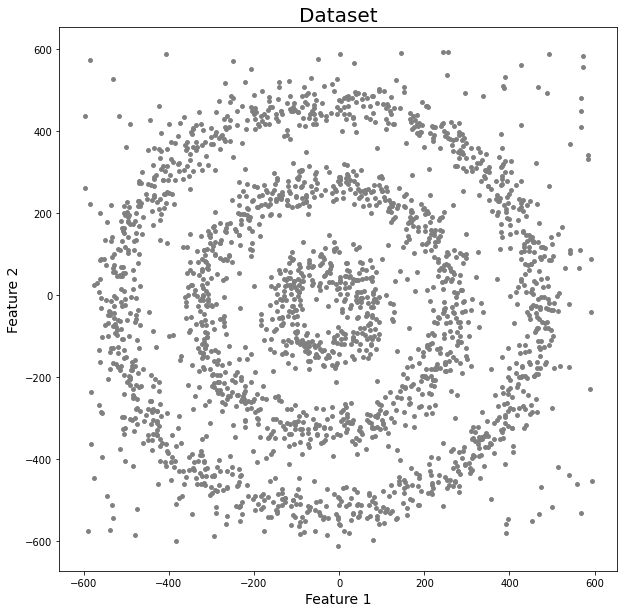

In [ ]:
# Plotting the datapoints
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20, )
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

<h3><b>K-Means</b></h3>

In [ ]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

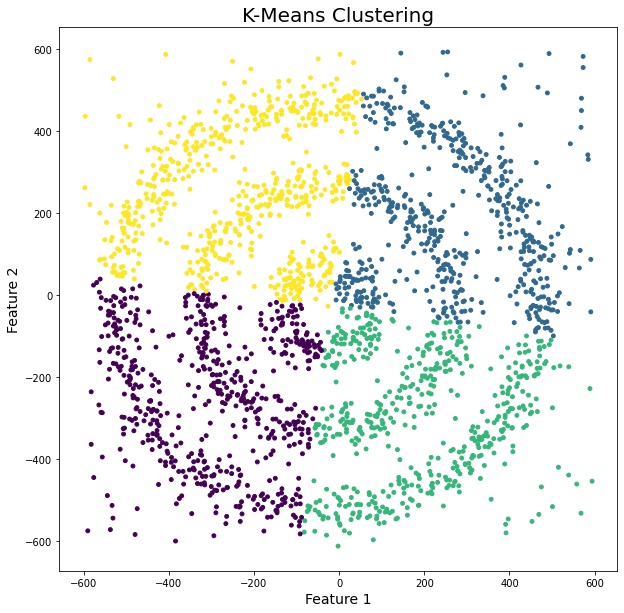

In [ ]:
df['KMeans_labels']=k_means.labels_
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

<h3><b>Hierarchical Clustering</b></h3>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

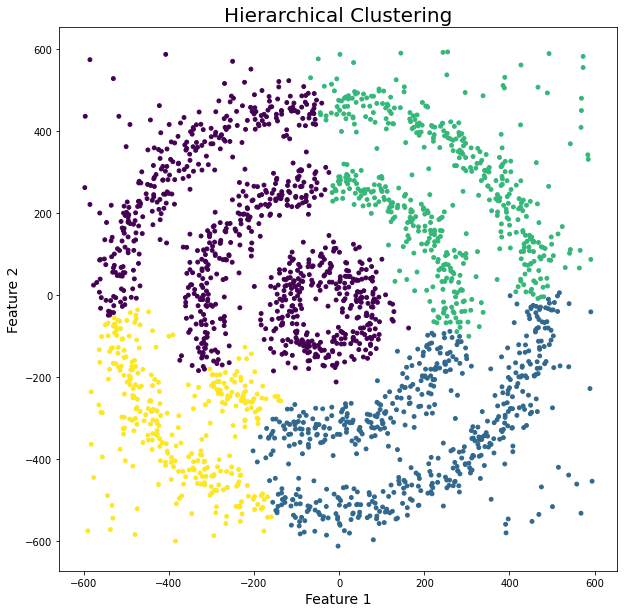

In [ ]:
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

<h3><b><u>DBSCAN Clustering</u></b></h3>

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

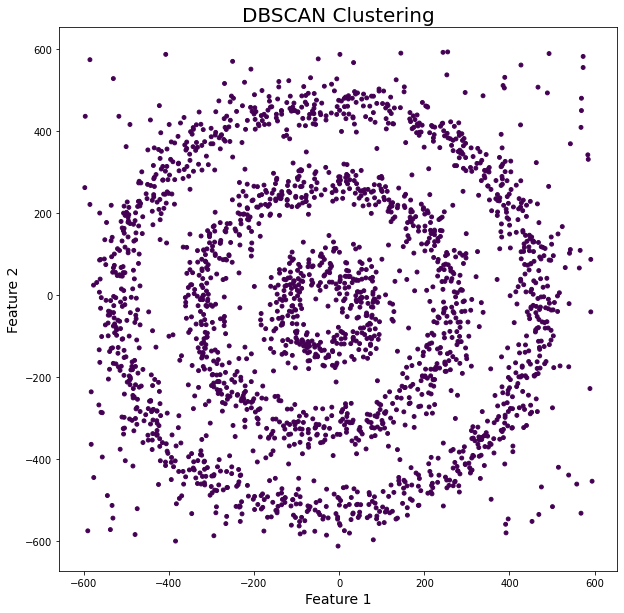

In [ ]:
df['DBSCAN_labels']=dbscan.labels_ 
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])
# The distance variable contains an array of distances between a data point and its nearest data point for all data points in the dataset.
distances  

array([[ 0.        ,  6.91861074],
       [ 0.        , 10.80836526],
       [ 0.        ,  7.56030267],
       ...,
       [ 0.        , 25.77071121],
       [ 0.        , 23.34523506],
       [ 0.        , 37.73592453]])

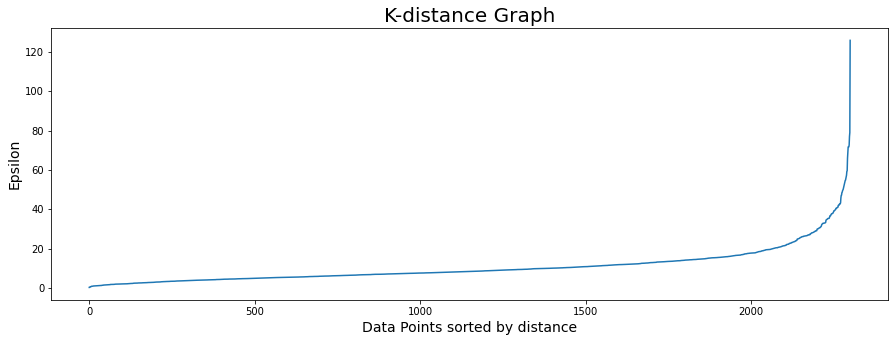

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

<h3>The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph</h3>

In [ ]:
from sklearn.cluster import DBSCAN
# setting epsilon value to 30 and min_samples to 6
dbscan_opt=DBSCAN(eps=30,min_samples=6)   
dbscan_opt.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [ ]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()
# Here, 0, 1 and 2 are the three different clusters, and -1 is the noise

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

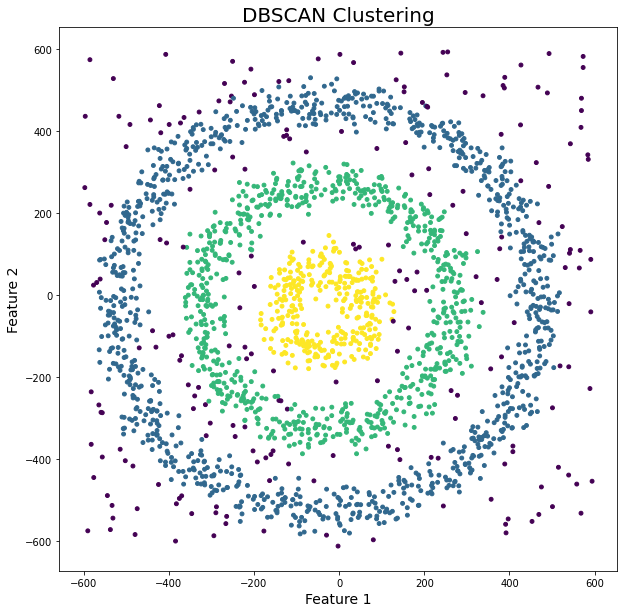

In [ ]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

<h3>Now compring all the 3 Density-Based clustering Algorithms, K-Means and Hierarchical failed to cluster the data points. Also, they were not able to properly detect the noise present in the dataset. Whereas DBSCAN is not just able to cluster the data points correctly, but it also perfectly detects noise in the dataset.</h3>

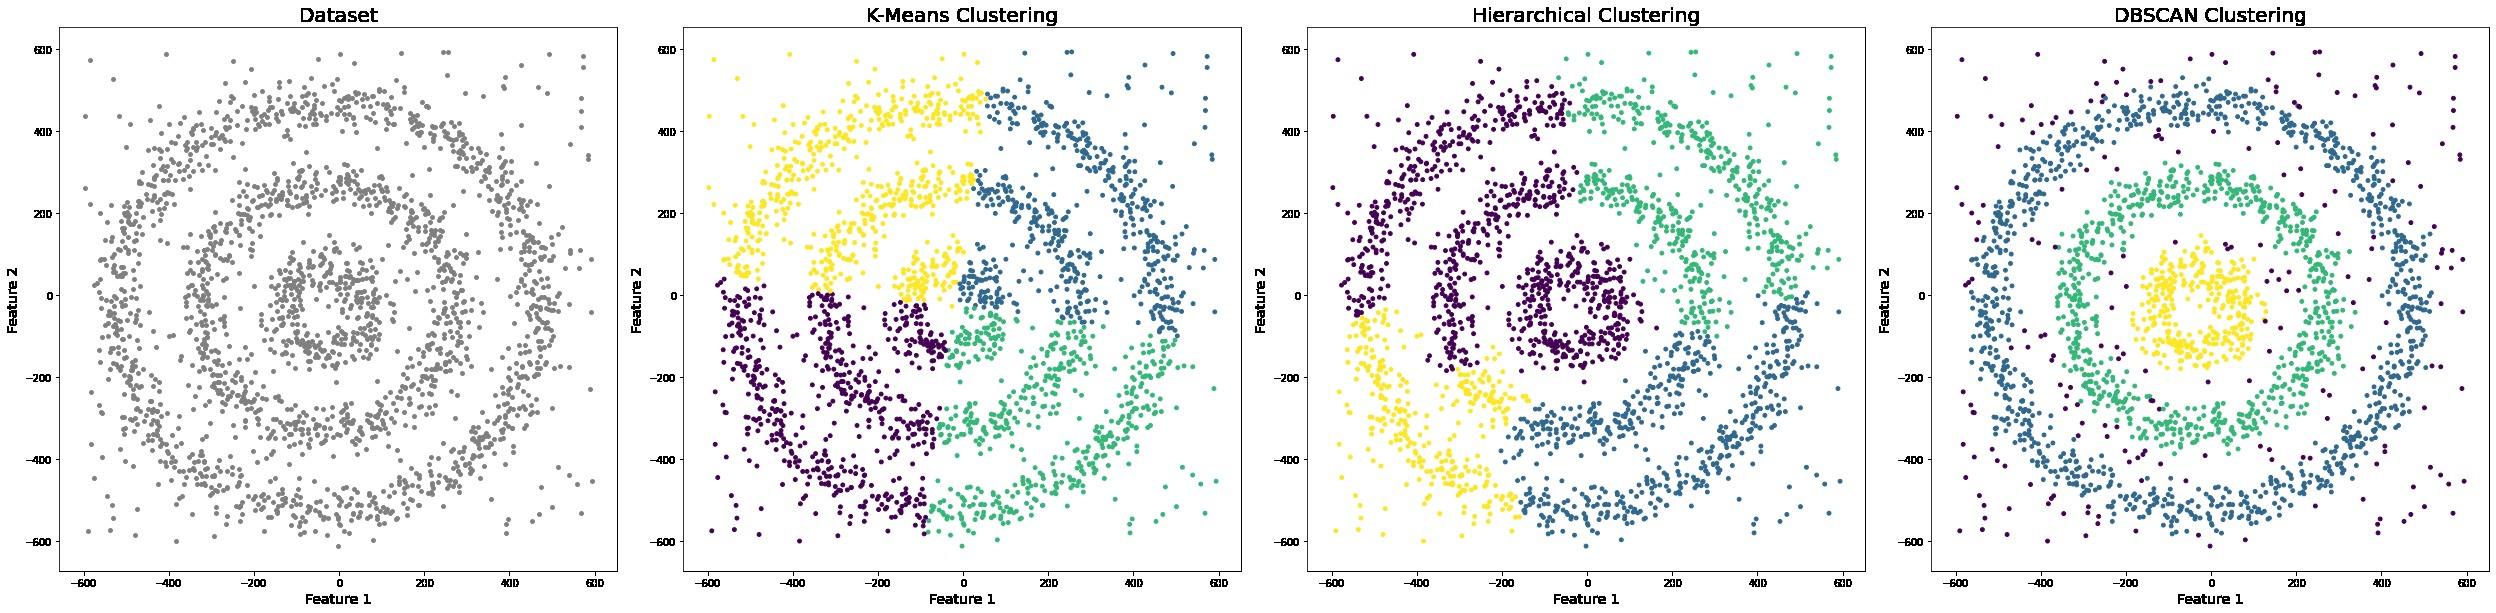

<h1><b><u>Application</u></b></h1><h3>Clustering is an essential technique in machine learning and is used widely across domains and industries (think about Uber’s route optimization, Amazon’s recommendation system, Netflix’s customer segmentation, and so on).</h3>

<h1><b><u>Conclusion</u></b></h1><h3>Density-based clustering algorithms can learn clusters of arbitrary shape, and with the Level Set Tree algorithm, one can learn clusters in datasets that exhibit wide differences in density.</h3>